In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


In [42]:
# Membaca gambar awal
adudu = plt.imread("Assets/adudu.jpg")
boboiboy = plt.imread("Assets/boboiboy.jpg")

adudu_gray = cv.cvtColor(adudu, cv.COLOR_BGR2GRAY)
boboiboy_gray = cv.cvtColor(boboiboy, cv.COLOR_BGR2GRAY)

In [43]:
kernel_sharp = [
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9]
]

kernel_smooth = [
    [1/10, 1/10, 1/10],
    [1/10, 1/5,  1/10],
    [1/10, 1/10, 1/10]
]


def apply_kernel(image, kernel):
    height = len(image)
    width = len(image[0])
    ksize = len(kernel)
    pad = ksize // 2

    output = [[0 for _ in range(width)] for _ in range(height)]

    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            total = 0.0
            for m in range(ksize):
                for n in range(ksize):
                    pi = i + m - pad
                    pj = j + n - pad
                    total += get_pixel(pi, pj) * kernel[m][n]
            output[i][j] = int(max(0, min(255, total)))  # Clamp to 0–255
    return output

# Aplikasikan smoothing dan sharpening
adudu_semut = apply_kernel(adudu_gray, kernel_smooth)
adudu_sharp = apply_kernel(adudu_gray, kernel_sharp)

In [44]:
def mean_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    output = [[0 for _ in range(width)] for _ in range(height)]

    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            total = 0
            count = 0
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    total += get_pixel(i + m, j + n)
                    count += 1
            output[i][j] = total // count
    return output


In [45]:
def median_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    # Buat output kosong
    output = [[0 for _ in range(width)] for _ in range(height)]

    # Padding manual dengan perbatasan terluar
    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            window = []
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    window.append(get_pixel(i + m, j + n))
            window.sort()
            mid = len(window) // 2
            output[i][j] = window[mid]
    return output


In [46]:
def modus_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    output = [[0 for _ in range(width)] for _ in range(height)]

    # Padding manual
    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            count = {}
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    val = get_pixel(i + m, j + n)
                    if val in count:
                        count[val] += 1
                    else:
                        count[val] = 1
            # Cari nilai dengan kemunculan terbanyak
            max_count = 0
            mode_value = 0
            for key in count:
                if count[key] > max_count:
                    max_count = count[key]
                    mode_value = key
            output[i][j] = mode_value
    return output


In [47]:
def conv(img,kernel):
    h_img, w_img = img.shape  
    h_ker,w_ker  = kernel.shape
    
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    h_res = h_img
    w_res = w_img
    
    l_pad = w_center
    r_pad = w_ker - w_center
    t_pad = h_center
    b_pad = h_ker - h_center
    
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'edge')

    result = np.zeros((h_res,w_res))

    for i in range(h_res):
        for j in range (w_res):
            temp = 0
            for k in range (h_ker):
                for l in range (w_ker):
                    temp+= arr[i+k,j+l]* kernel[k,l]
            result[i,j] = temp
    return  result

In [48]:
img1 = mean_filtering(adudu_gray,ksize=3)
img2 = mean_filtering(adudu_gray,ksize=9)
img3 = modus_filtering(adudu_gray,ksize=3)
img4 = modus_filtering(adudu_gray,ksize=9)
img5 = median_filtering(adudu_gray,ksize=3)
img6 = median_filtering(adudu_gray,ksize=9)

C:\Users\User\AppData\Local\Temp\ipykernel_12044\49355931.py:19: RuntimeWarning: overflow encountered in scalar add
  total += get_pixel(i + m, j + n)


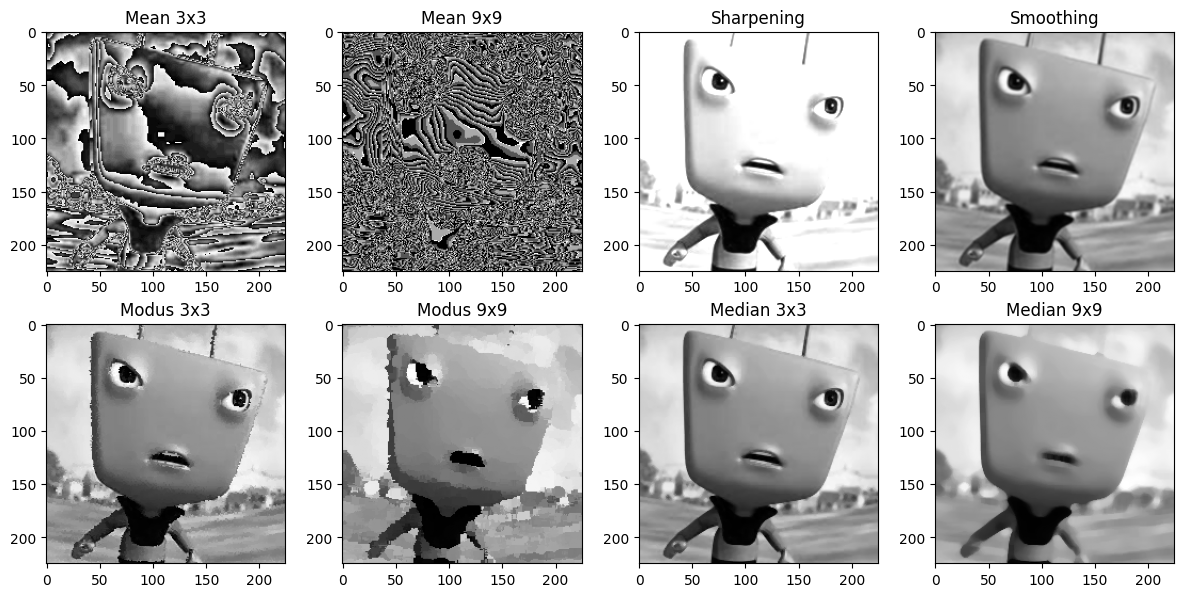

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(img1, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(img2, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(adudu_sharp, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(adudu_semut, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(img3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(img4, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(img5, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(img6, cmap='gray')
plt.tight_layout()
plt.show()

In [50]:
gx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
gy = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

prewitt

In [51]:
prewitt_mean_3x3 = np.abs(conv(np.array(img1), gx)) + np.abs(conv(np.array(img1), gy))
prewitt_mean_9x9 = np.abs(conv(np.array(img2), gx)) + np.abs(conv(np.array(img2), gy))
prewitt_sharpening = np.abs(conv(np.array(adudu_sharp), gx)) + np.abs(conv(np.array(adudu_sharp), gy))
prewitt_smoothing = np.abs(conv(np.array(adudu_semut), gx)) + np.abs(conv(np.array(adudu_semut), gy))
prewitt_modus_3x3 = np.abs(conv(np.array(img3), gx)) + np.abs(conv(np.array(img3), gy))
prewitt_modus_9x9 = np.abs(conv(np.array(img4), gx)) + np.abs(conv(np.array(img4), gy))
prewitt_median_3x3 = np.abs(conv(np.array(img5), gx)) + np.abs(conv(np.array(img5), gy))
prewitt_median_9x9 = np.abs(conv(np.array(img6), gx)) + np.abs(conv(np.array(img6), gy))


In [52]:
gx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Gradient Horizontal (Gx)
gy = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Gradient Vertikal (Gy)


sobel

In [53]:
# Sobel
sobel_mean_3x3 = np.abs(conv(np.array(img1), gx)) + np.abs(conv(np.array(img1), gy))
sobel_mean_9x9 = np.abs(conv(np.array(img2), gx)) + np.abs(conv(np.array(img2), gy))
sobel_sharpening = np.abs(conv(np.array(adudu_sharp), gx)) + np.abs(conv(np.array(adudu_sharp), gy))
sobel_smoothing = np.abs(conv(np.array(adudu_semut), gx)) + np.abs(conv(np.array(adudu_semut), gy))
sobel_modus_3x3 = np.abs(conv(np.array(img3), gx)) + np.abs(conv(np.array(img3), gy))
sobel_modus_9x9 = np.abs(conv(np.array(img4), gx)) + np.abs(conv(np.array(img4), gy))
sobel_median_3x3 = np.abs(conv(np.array(img5), gx)) + np.abs(conv(np.array(img5), gy))
sobel_median_9x9 = np.abs(conv(np.array(img6), gx)) + np.abs(conv(np.array(img6), gy))

In [54]:
gx = np.array([[0, 1], [0, -1]])  # Gradient Horizontal (Gx)
gy = np.array([[0, 0], [1, -1]])  # Gradient Vertikal (Gy)


robert

In [55]:


# Roberts
roberts_mean_3x3 = np.abs(conv(np.array(img1), gx)) + np.abs(conv(np.array(img1), gy))
roberts_mean_9x9 = np.abs(conv(np.array(img2), gx)) + np.abs(conv(np.array(img2), gy))
roberts_sharpening = np.abs(conv(np.array(adudu_sharp), gx)) + np.abs(conv(np.array(adudu_sharp), gy))
roberts_smoothing = np.abs(conv(np.array(adudu_semut), gx)) + np.abs(conv(np.array(adudu_semut), gy))
roberts_modus_3x3 = np.abs(conv(np.array(img3), gx)) + np.abs(conv(np.array(img3), gy))
roberts_modus_9x9 = np.abs(conv(np.array(img4), gx)) + np.abs(conv(np.array(img4), gy))
roberts_median_3x3 = np.abs(conv(np.array(img5), gx)) + np.abs(conv(np.array(img5), gy))
roberts_median_9x9 = np.abs(conv(np.array(img6), gx)) + np.abs(conv(np.array(img6), gy))


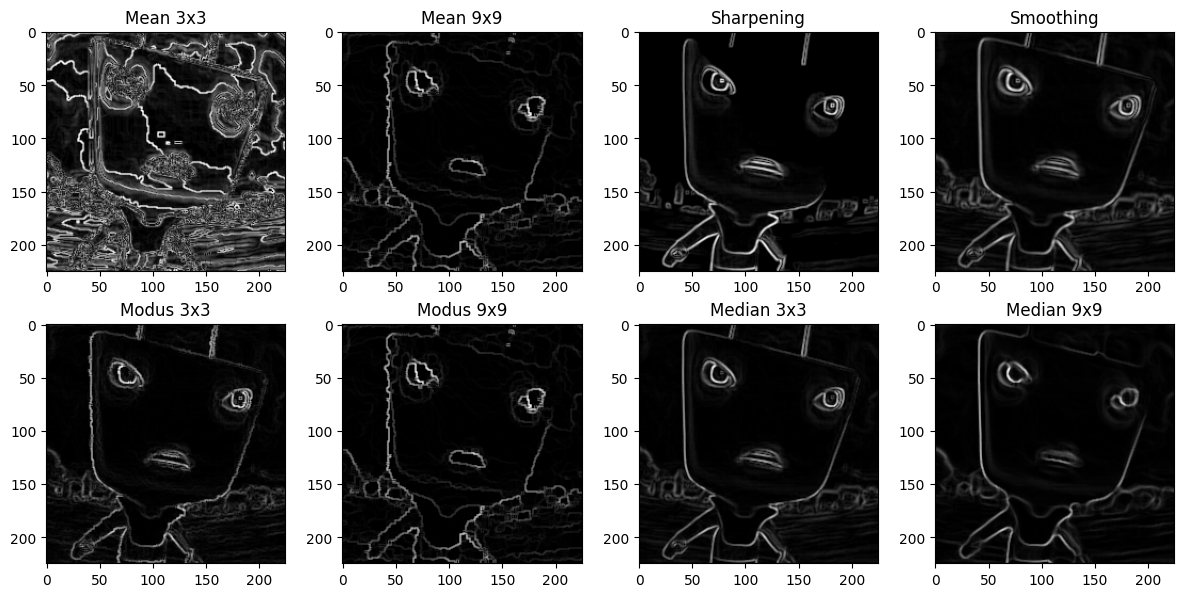

In [56]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(prewitt_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(prewitt_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(prewitt_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(prewitt_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(prewitt_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(prewitt_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()


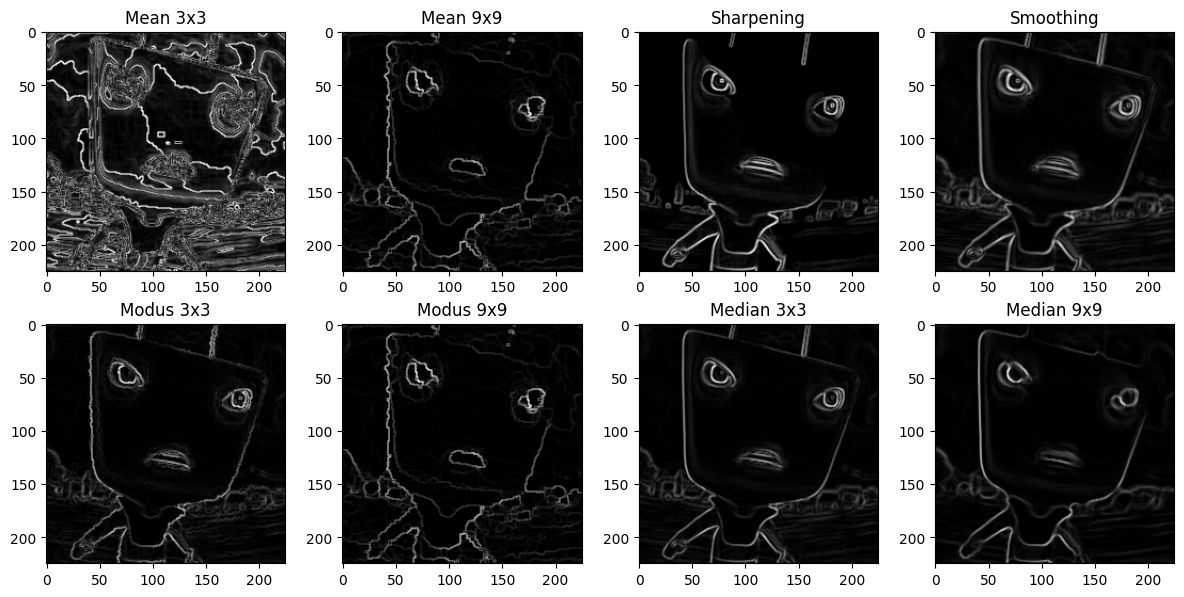

In [57]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(sobel_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(sobel_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(sobel_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(sobel_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(sobel_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(sobel_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()


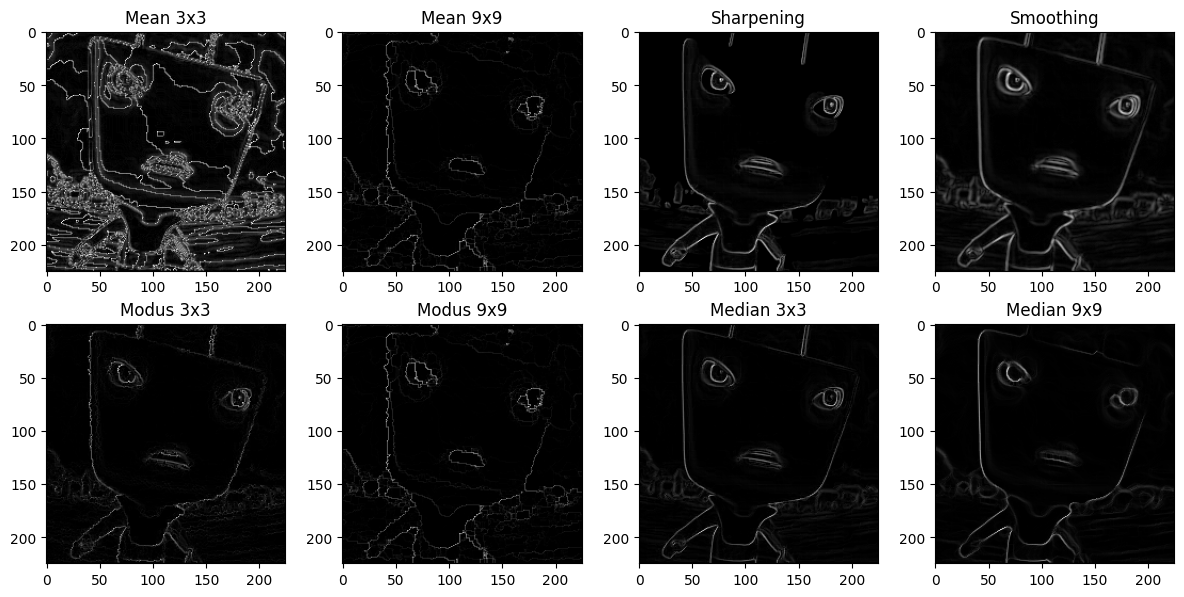

In [58]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(roberts_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(roberts_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(roberts_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(roberts_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(roberts_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(roberts_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()
